# Leyendo archivo con pandas

In [4]:
import pandas as pd

In [5]:
url = "pima-indians-diabetes.data.csv"

In [6]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [7]:
data = pd.read_csv(url, names=names)

In [8]:
data

preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]

In [13]:
import matplotlib.pyplot as plt

In [8]:
data_sorted=data.sort_values(by='age')

In [20]:
data.describe()

preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

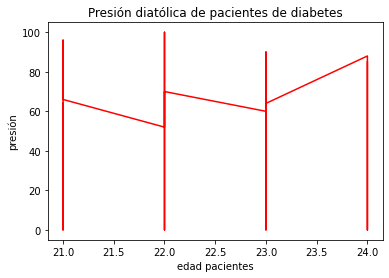

In [10]:
fig, ax = plt.subplots()
ax.plot(data_sorted[data_sorted['age']<25]['age'], data_sorted[data_sorted['age']<25]['pres'],'r')

ax.set(xlabel='edad pacientes', ylabel='presión',
       title='Presión diatólica de pacientes de diabetes')
#ax.grid()

fig.savefig("grafico.png")
plt.show()

In [11]:
data_sorted[data_sorted['age']<25]['age']

255    21
60     21
102    21
182    21
623    21
       ..
89     24
454    24
79     24
524    24
109    24
Name: age, Length: 219, dtype: int64

In [12]:
data_sorted[data_sorted['age']<25]['pres']

255    64
60      0
102    96
182    74
623    70
       ..
89     68
454    54
79     66
524    58
109    85
Name: pres, Length: 219, dtype: int64

In [13]:
data_sorted[data_sorted['age']<25]['age'].count()

219

In [14]:
data_sorted[data_sorted['age']<25]['age'].count()

219

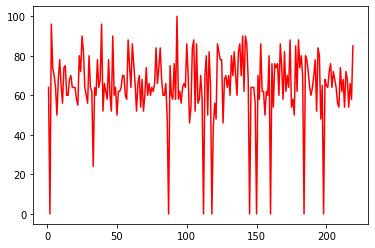

In [15]:
plt.plot(range(1,data_sorted[data_sorted['age']<25]['age'].count()+1),data_sorted[data_sorted['age']<25]['pres'],'r')
plt.show()

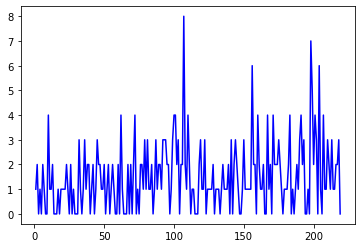

In [16]:
plt.plot(range(1,data_sorted[data_sorted['age']<25]['age'].count()+1),data_sorted[data_sorted['age']<25]['preg'],'b')
plt.show()

In [17]:
a=data_sorted.age.unique()
print(a)
pd.concat([pd.DataFrame([[i,data_sorted[data_sorted['age']==i]['pres'].mean()]], columns=['age','pres']) for i in a], ignore_index=True)


[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 72 81]


age       pres
0    21  65.936508
1    22  63.722222
2    23  64.315789
3    24  64.956522
4    25  59.666667
5    26  64.181818
6    27  73.500000
7    28  68.314286
8    29  68.241379
9    30  64.857143
10   31  64.375000
11   32  70.062500
12   33  65.647059
13   34  74.000000
14   35  75.600000
15   36  69.125000
16   37  75.947368
17   38  71.125000
18   39  72.666667
19   40  69.230769
20   41  67.590909
21   42  73.388889
22   43  78.461538
23   44  61.750000
24   45  83.066667
25   46  76.000000
26   47  78.333333
27   48  78.400000
28   49  81.400000
29   50  78.250000
30   51  84.500000
31   52  81.500000
32   53  79.000000
33   54  89.333333
34   55  70.250000
35   56  76.333333
36   57  76.800000
37   58  78.285714
38   59  74.000000
39   60  80.000000
40   61  76.000000
41   62  71.500000
42   63  78.000000
43   64  78.000000
44   65  78.666667
45   66  86.000000
46   67  72.666667
47   68  82.000000
48   69  81.000000
49   70  82.000000
50   72   0.000000
51   81  74.000000

In [18]:
df=data_sorted.groupby('age')['pres'].mean().reset_index()
df

age       pres
0    21  65.936508
1    22  63.722222
2    23  64.315789
3    24  64.956522
4    25  59.666667
5    26  64.181818
6    27  73.500000
7    28  68.314286
8    29  68.241379
9    30  64.857143
10   31  64.375000
11   32  70.062500
12   33  65.647059
13   34  74.000000
14   35  75.600000
15   36  69.125000
16   37  75.947368
17   38  71.125000
18   39  72.666667
19   40  69.230769
20   41  67.590909
21   42  73.388889
22   43  78.461538
23   44  61.750000
24   45  83.066667
25   46  76.000000
26   47  78.333333
27   48  78.400000
28   49  81.400000
29   50  78.250000
30   51  84.500000
31   52  81.500000
32   53  79.000000
33   54  89.333333
34   55  70.250000
35   56  76.333333
36   57  76.800000
37   58  78.285714
38   59  74.000000
39   60  80.000000
40   61  76.000000
41   62  71.500000
42   63  78.000000
43   64  78.000000
44   65  78.666667
45   66  86.000000
46   67  72.666667
47   68  82.000000
48   69  81.000000
49   70  82.000000
50   72   0.000000
51   81  74.000000

# Subplots

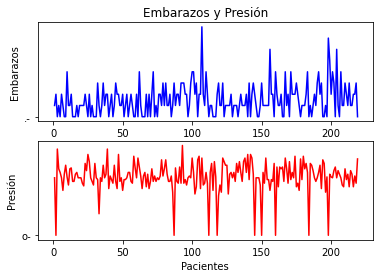

In [19]:


plt.subplot(2, 1, 2)
plt.plot(range(1,data_sorted[data_sorted['age']<25]['age'].count()+1),data_sorted[data_sorted['age']<25]['pres'],'r', 'o-')
plt.xlabel('Pacientes')
plt.ylabel('Presión')

plt.subplot(2, 1, 1)
plt.title('Embarazos y Presión')
plt.plot(range(1,data_sorted[data_sorted['age']<25]['age'].count()+1),data_sorted[data_sorted['age']<25]['preg'],'b','.-' )

plt.ylabel('Embarazos')




plt.show()

In [20]:
averages = pd.DataFrame()
averages = averages.append(data[data['age']<30][['plas','pres']].mean(),ignore_index=True)
averages = averages.append(data[(data['age']>=30) & (data['age']<40)][['plas','pres']].mean(),ignore_index=True)
averages = averages.append(data[(data['age']>=40) & (data['age']<50)][['plas','pres']].mean(),ignore_index=True)
averages = averages.append(data[(data['age']>=50) & (data['age']<60)][['plas','pres']].mean(),ignore_index=True)    
averages = averages.append(data[data['age']>=60][['plas','pres']].mean(),ignore_index=True)
averages

plas       pres
0  113.744949  65.348485
1  125.309091  69.666667
2  124.644068  73.940678
3  140.280702  79.807018
4  138.250000  75.812500

In [21]:
data[(data['age']>=30) & (data['age']<40)][['pres','age']].mean()

pres    69.666667
age     34.109091
dtype: float64

In [22]:
data['age']>=30

0       True
1       True
2       True
3      False
4       True
       ...  
763     True
764    False
765     True
766     True
767    False
Name: age, Length: 768, dtype: bool

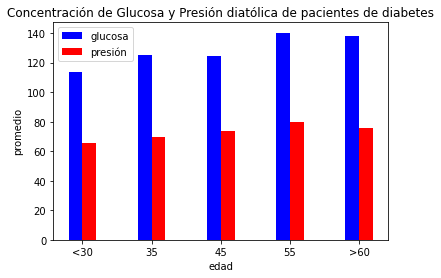

In [23]:
import numpy as np
from matplotlib.ticker import MaxNLocator
ind = np.arange(averages['plas'].count())
width = 0.35
fig, ax = plt.subplots()
ax.bar(ind-0.2,averages['plas'],width=0.2,color='b',align='center',label='glucosa')
ax.bar(ind,averages['pres'],width=0.2,color='r',align='center',label='presión')
ax.set(ylabel='promedio', xlabel='edad',
       title='Concentración de Glucosa y Presión diatólica de pacientes de diabetes')
ax.set_xticks(ind-.1)
ax.set_xticklabels(('<30', '35', '45', '55', '>60'))
plt.legend(loc='best')

plt.show()







In [24]:
ind = np.arange(averages['plas'].count())
print(ind)

[0 1 2 3 4]


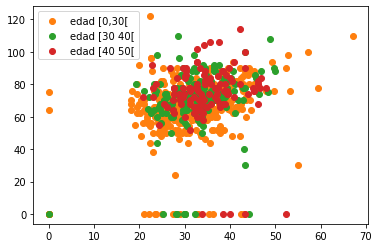

In [25]:
sd1 = data[data['age']<30][['mass','pres']]
sd2 = data[(data['age']>=30) & (data['age']<40)][['mass','pres']]
sd3 = data[(data['age']>=40) & (data['age']<50)][['mass','pres']]
plt.scatter(sd1['mass'], sd1['pres'], c='C1',label='edad [0,30[')
plt.scatter(sd2['mass'], sd2['pres'], c='C2',label='edad [30 40[')
plt.scatter(sd3['mass'], sd3['pres'], c='C3',label='edad [40 50[')
plt.legend(loc='best')
plt.show()

In [26]:
p=[]
p.append(data[data['age']<30]['age'].count())
p.append(data[(data['age']>=30) & (data['age']<40)]['age'].count())
p.append(data[(data['age']>=40) & (data['age']<50)]['age'].count())
p.append(data[(data['age']>=50) & (data['age']<60)]['age'].count())    
p.append(data[data['age']>=60]['age'].count())
p

[396, 165, 118, 57, 32]

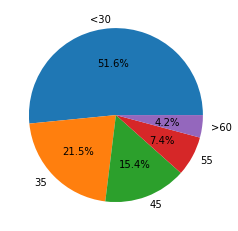

In [27]:
plt.pie(p, labels=('<30', '35', '45', '55', '>60'),autopct='%1.1f%%')
plt.show()

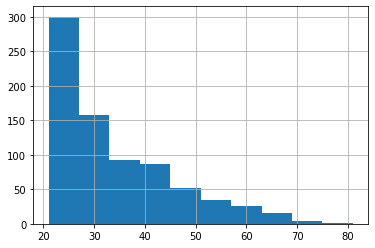

In [48]:
data['age'].hist(bins=10)
plt.show()

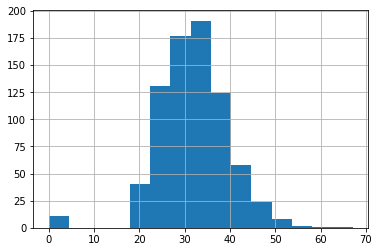

In [47]:
data['mass'].hist(bins=15)
plt.show()

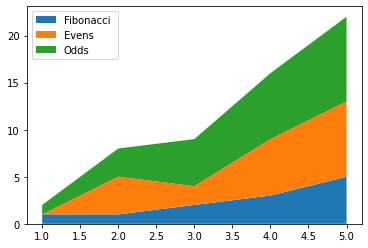

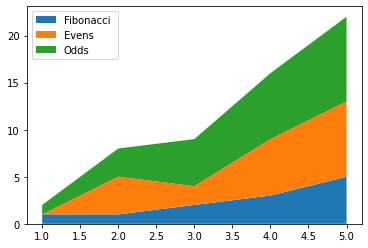

In [53]:
x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 2, 4, 6, 8]
y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3])

labels = ["Fibonacci ", "Evens", "Odds"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y, labels=labels)
ax.legend(loc='upper left')
plt.show()

In [51]:
y

array([[1, 1, 2, 3, 5],
       [0, 4, 2, 6, 8],
       [1, 3, 5, 7, 9]])

# Usando seaborn

In [10]:
import seaborn as sns

In [11]:
import scipy.io as sio

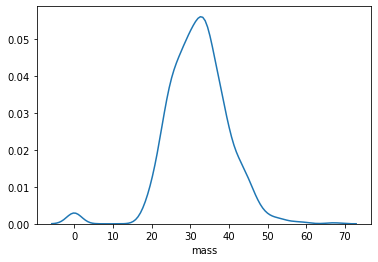

In [62]:
sns.distplot(data['mass'],hist=False,bins=15)
plt.show()

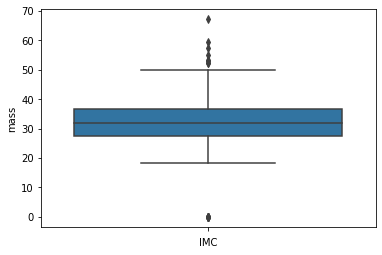

In [60]:
sns.boxplot(data['mass'],orient='v').set(
    xlabel='IMC')
plt.show()

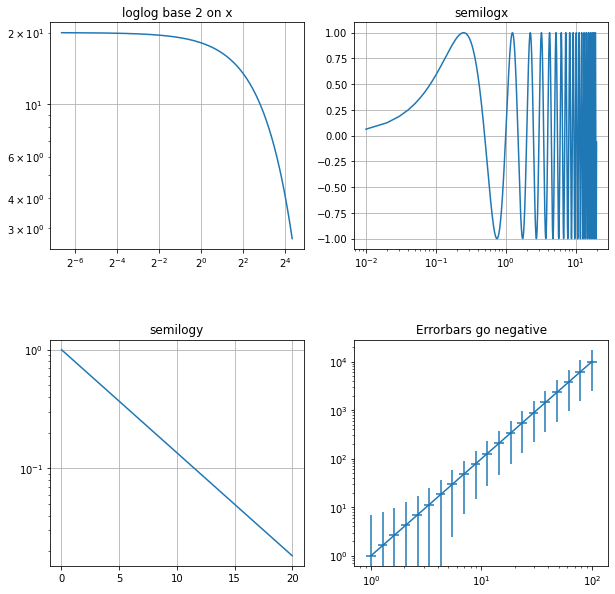

In [75]:
import numpy as np
import matplotlib.pyplot as plt
plt.subplots(2,2,figsize=(10,10))

plt.subplots_adjust(hspace=0.4)
t = np.arange(0.01, 20.0, 0.01)

# log y axis
plt.subplot(2,2,3)
plt.semilogy(t, np.exp(-t/5.0))
plt.title('semilogy')
plt.grid(True)

# log x axis
plt.subplot(2,2,2)
plt.semilogx(t, np.sin(2*np.pi*t))
plt.title('semilogx')
plt.grid(True)

# log x and y axis
plt.subplot(2,2,1)
plt.loglog(t, 20*np.exp(-t/10.0), basex=2)
plt.grid(True)
plt.title('loglog base 2 on x')

# with errorbars: clip non-positive values
ax = plt.subplot(2,2,4)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')


x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0
plt.errorbar(x, y, xerr=0.1*x, yerr=5.0 + 0.75*y)
#ax.set_ylim(ymin=0.1)
ax.set_title('Errorbars go negative')


plt.show()

In [69]:
t

array([1.000e-02, 2.000e-02, 3.000e-02, ..., 1.997e+01, 1.998e+01,
       1.999e+01])

[]

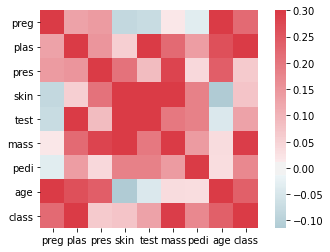

In [14]:
corr = data.corr()
#f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True)
plt.plot()

[]

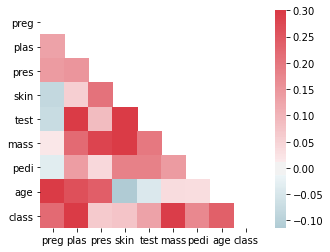

In [37]:
corr = data.corr()
#f, ax = plt.subplots(figsize=(11, 9))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True)
plt.plot()

In [18]:
import numpy as np
mask=np.zeros_like(corr, dtype=np.bool)
print(mask)
s=np.triu_indices_from(mask)
print(s)
j=np.triu(mask)
print(j)


[[False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]]
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7,
       8], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6,
       7, 8, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 5, 6, 7, 8, 6, 7, 8, 7, 8,
       8], dtype=int64))
[[False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False Fal

In [19]:
print(corr)

           preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.263514  0.466581  
pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.0335

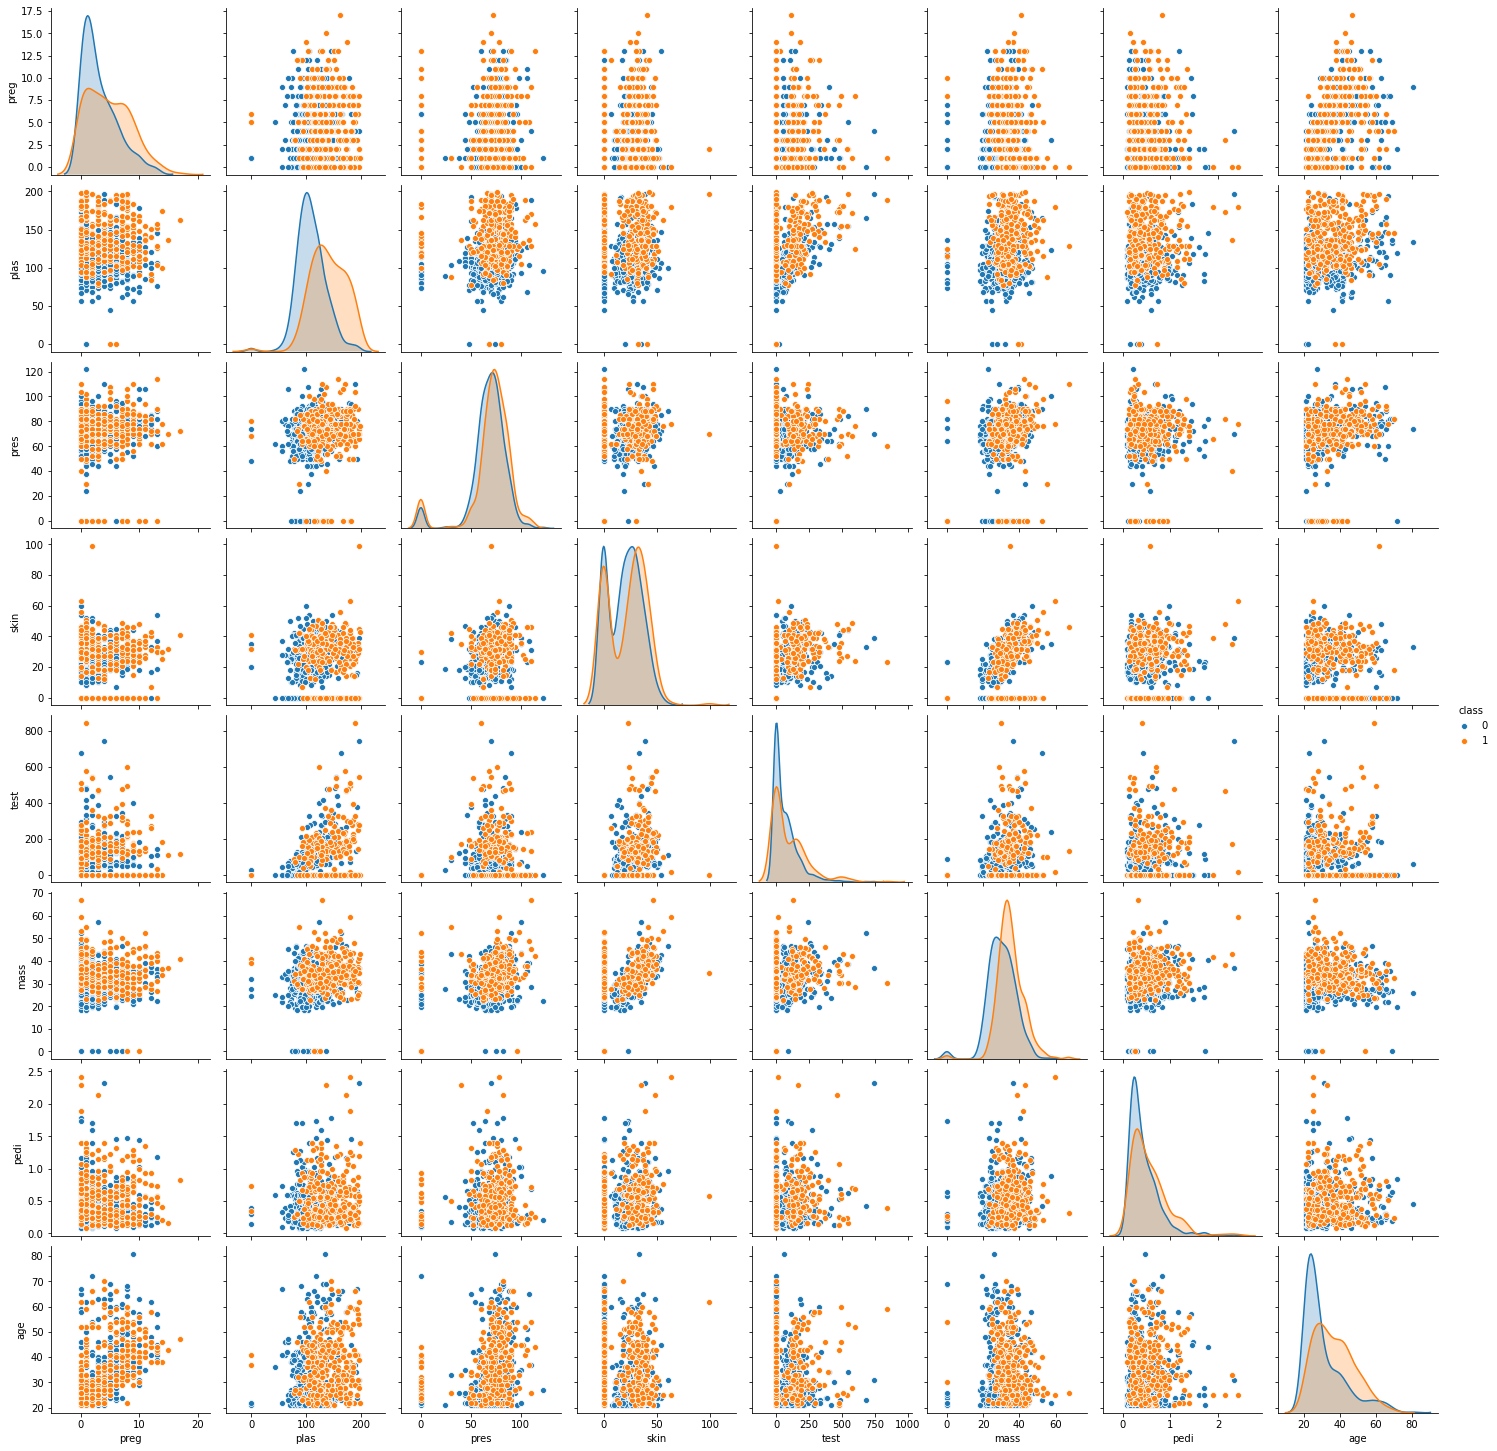

In [38]:
sns.pairplot(data,hue="class")
plt.show()

In [21]:
data.idxmax()

preg     159
plas     661
pres     106
skin     579
test      13
mass     177
pedi     445
age      459
class      0
dtype: int64

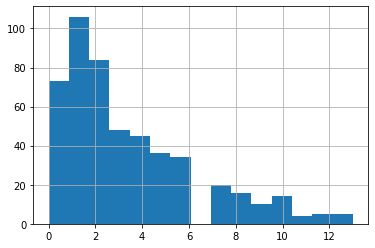

In [25]:
data[data['class']==0]['preg'].hist(bins=15)
plt.show()

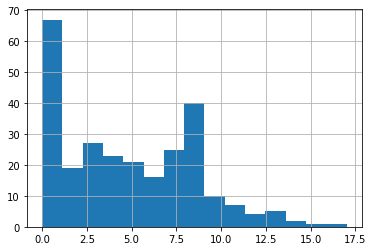

In [26]:
data[data['class']==1]['preg'].hist(bins=15)
plt.show()

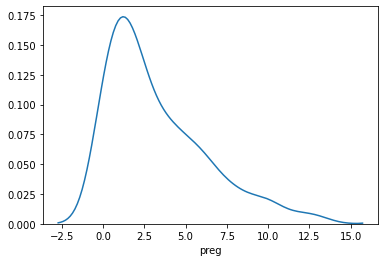

In [27]:
sns.distplot(data[data['class']==0]['preg'],hist=False,bins=15)

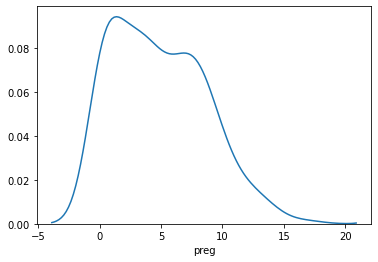

In [28]:
sns.distplot(data[data['class']==1]['preg'],hist=False,bins=15)

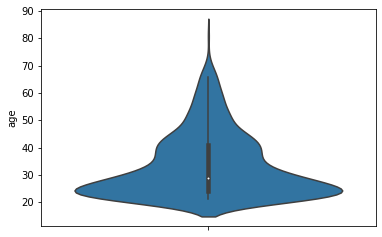

In [39]:
sns.violinplot(data['age'],orient='v')
plt.show()

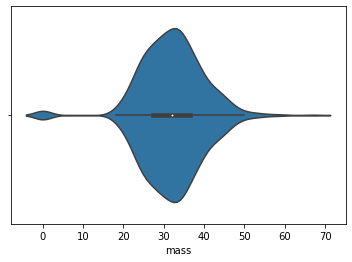

In [31]:
sns.violinplot(data['mass'])
plt.show()